In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

dataset = pd.read_csv("Advertising.csv", index_col = 0) # Use the first column (indexed 0) as the index of the rows
print("DONE")

DONE


In [12]:
dataset.head() # QUick Summary of the contents in the data set


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
dataset.info() # More useful information


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [14]:
dataset.describe() # Provide Summary Statistics

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
X = np.c_[np.ones((200, 1)), dataset["TV"].values]

y = dataset["sales"].values.reshape((200,1)) 

y.shape # What is this code block doing?

(200, 1)

In [16]:
## Linear Regression using Normal Equations
import numpy as np

w_opt = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)

w_opt

array([[7.03259355],
       [0.04753664]])

In [20]:
## Using SKLEARN Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_## part-b


(array([7.03259355]), array([[0.        , 0.04753664]]))

In [23]:

## Using Statistical Library
import statsmodels.formula.api as sm
results = sm.ols('sales ~ TV', dataset).fit()
print(results.summary())

## P >|t|  is p-value

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        20:13:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

RSS = [11596.1078308]


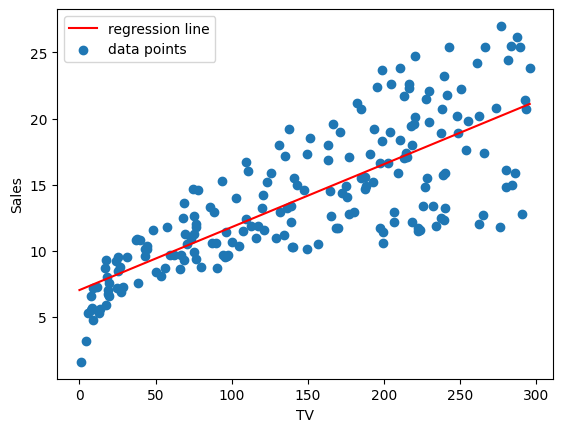

In [22]:
%matplotlib inline

## part-b (display)
import matplotlib.pyplot as plt 


x_line = np.arange(0, np.max(dataset["TV"]))
y_line = x_line * w_opt[1,0] + w_opt[0,0] 

plt.plot(x_line, y_line, color ="r", label='regression line') # labeling

plt.scatter(dataset["TV"].values, dataset["sales"].values, label='data points')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')

RSSTV = sum((X.dot(w_opt)-y)**2)

print("RSS =", RSSTV)

RSS = [3618.47954903]


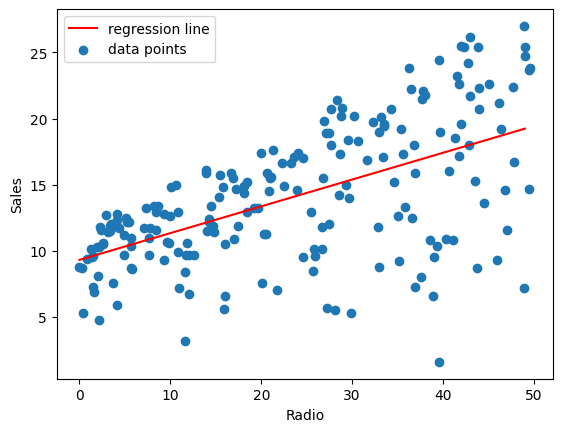

In [20]:
## part-d (Sales vs Radio)
X = np.c_[np.ones((200, 1)), dataset["radio"].values]
y = dataset["sales"].values.reshape((200,1))

w_opt1 = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)


x_line = np.arange(0, np.max(dataset["radio"]))
y_line = x_line * w_opt1[1,0] + w_opt1[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["radio"].values, dataset["sales"].values, label='data points')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend(loc='upper left')

RSSRadio = sum((X.dot(w_opt1)-y)**2)
print("RSS =", RSSRadio)

RSS = [5134.80454411]


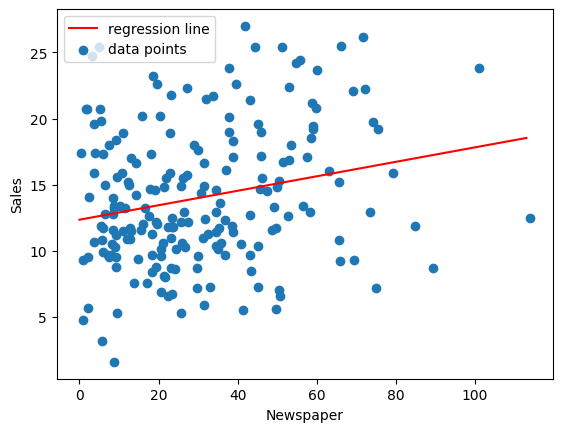

In [25]:
## part-d (Sales vs Newspaper)
X = np.c_[np.ones((200, 1)), dataset["newspaper"].values]
y = dataset["sales"].values.reshape((200,1))

w_opt2 = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)


x_line = np.arange(0, np.max(dataset["newspaper"]))
y_line = x_line * w_opt2[1,0] + w_opt2[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(dataset["newspaper"].values, dataset["sales"].values, label='data points')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend(loc='upper left')

RSSNewspaper = sum((X.dot(w_opt2)-y)**2)
print("RSS =", RSSNewspaper)

In [27]:
# PROBLEM 5 - Multiple linear regression
X = np.c_[np.ones((200, 1)), dataset[["TV","radio","newspaper"]].values]
y = dataset["sales"].values.reshape((200,1))

w_optALL = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
RSSALL = sum((X.dot(w_optALL)-y)**2)

print("RSSALL =", RSSALL)
print("Coefficients =", w_optALL)

print("RSSTV =", RSSTV)
print("CoefficientTV =", w_opt)


print("RSSRadio =", RSSRadio)
print("CoefficientRadio =", w_opt1)


print("RSSNewspaper =", RSSNewspaper)
print("CoefficientTV =", w_opt2)

RSSALL = [556.8252629]
Coefficients = [[ 2.93888937e+00]
 [ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]]
RSSTV = [11596.1078308]
CoefficientTV = [[7.03259355]
 [0.04753664]]
RSSRadio = [3618.47954903]
CoefficientRadio = [[9.3116381 ]
 [0.20249578]]
RSSNewspaper = [5134.80454411]
CoefficientTV = [[12.35140707]
 [ 0.0546931 ]]


In [28]:
## Multiple Linear Regression  Using Statistical Library
import statsmodels.formula.api as sm
results = sm.ols('sales ~ TV + radio + newspaper', dataset).fit() # how to include all of the data points
print(results.summary())

## P >|t|  is p-value

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        20:18:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [31]:
corr_matrix = dataset.corr()
print(corr_matrix)
corr_matrix


                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
